<a href="https://colab.research.google.com/github/irinagetman1973/Super-Resolution/blob/main/HAT_(Hybrid_Attention_Transformer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run this block to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#install dependencies
!pip install basicsr==1.3.4.9

In [ ]:
!pip install -U torch torchvision 

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from random import shuffle
import cv2

###Create LR & HR folders in datasets folder 

In [ ]:
#change working directory
os.chdir('/content/drive/MyDrive/HAT')
os.getcwd()

'/content/drive/MyDrive/HAT'

In [ ]:
cd datasets

[Errno 2] No such file or directory: 'datasets'
/content/drive/MyDrive/HAT/datasets


In [ ]:
"""
GTmod2 folder for Ground Truth/High Resolution images
    and LR is for Low Resolution images
    for x2 resolution, GT images must be two times bigger in size
    compare to LR ones. Filenames must be identical 
    as well as number of images in both folders
"""
os.makedirs('GTmod2', exist_ok=True)
os.makedirs('LRbicx2', exist_ok=True)

In [ ]:
# list existing directories 
os.listdir()

['README.md', 'GTmod2', 'LRbicx2']

In [ ]:
# go back to HAT
os.chdir('/content/drive/MyDrive/HAT')

In [ ]:
!python setup.py develop

/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ********************************************************************************

!!
  dist.fetch_build_eggs(dist.setup_requires)
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
 

## Testing first images in Testing/train_HR and Testing/train_LR folders in MyDrive

In [ ]:
#moving  images  to GT and LR directories

#set the path to the source dir and destination dir for GT/HR images
src_dir_GT='/content/drive/MyDrive/Testing/train_HR/'
dst_dir_GT='/content/drive/MyDrive/HAT/datasets/GTmod2'


# get a list of all the files in the source directory
files = sorted(os.listdir(src_dir_GT))

# use the first file in the list as the source file to copy
src_file = os.path.join(src_dir_GT, files[0])

# copy first image
shutil.copy(src_file, dst_dir_GT)

In [ ]:
#moving  images  to LR directories

#set the path to the source dir and destination dir for GT/HR images
src_dir_GT='/content/drive/MyDrive/Testing/train_LR/X4/'
dst_dir_GT='/content/drive/MyDrive/HAT/datasets/LRbicx2'


# get a list of all the files in the source directory
files = sorted(os.listdir(src_dir_GT))

# use the first file in the list as the source file to copy
src_file = os.path.join(src_dir_GT, files[0])

# copy first image
shutil.copy(src_file, dst_dir_GT)

In [ ]:
#test

!python /content/drive/MyDrive/HAT/hat/test.py -opt options/test/HAT-L_SRx2_ImageNet-pretrain.yml

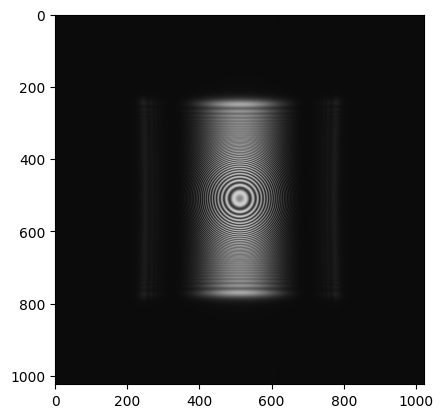

In [ ]:
# display HAT SR image

# Open the image
img = Image.open("/content/drive/MyDrive/HAT/results/HAT-L_SRx2_ImageNet-pretrain/visualization/Set5/00001_HAT-L_SRx2_ImageNet-pretrain.png")

# Display the image using matplotlib
plt.imshow(img)
plt.show()

## Comparing HAT image and LR image side by side

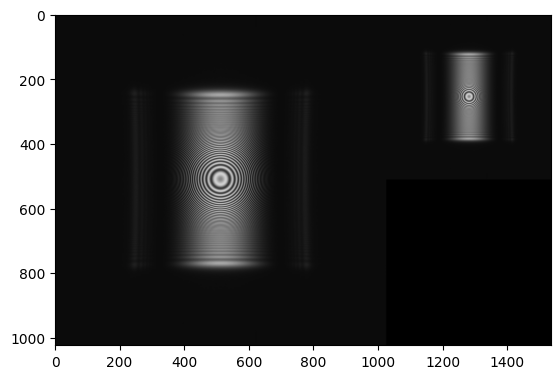

In [ ]:
# Merging images together

# Open the first image
img1 = Image.open("/content/drive/MyDrive/HAT/results/HAT-L_SRx2_ImageNet-pretrain/visualization/Set5/00001_HAT-L_SRx2_ImageNet-pretrain.png")

# Open the second image
img2 = Image.open("/content/drive/MyDrive/HAT/datasets/LRbicx2/00001.png")

# Get the dimensions of the images
width1, height1 = img1.size
width2, height2 = img2.size

# Create a new image with double the width of the original images
new_img = Image.new('RGB', (width1 + width2, max(height1, height2)))

# Paste the first image onto the left half of the new image
new_img.paste(img1, (0, 0))

# Paste the second image onto the right half of the new image
new_img.paste(img2, (width1, 0))

# Convert the PIL image to a numpy array
new_img_arr = np.array(new_img)

# Display the new image using matplotlib

plt.imshow(new_img_arr)
plt.show()



## Comparing GT image and HAt image

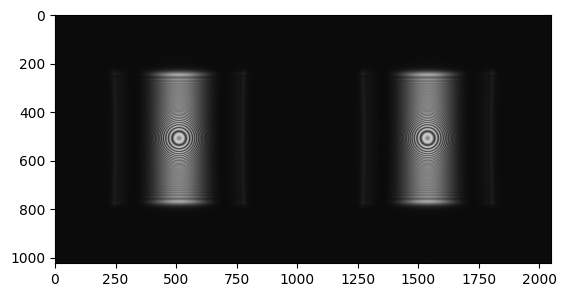

In [ ]:

# Open the first image
img1 = Image.open("/content/drive/MyDrive/HAT/results/HAT-L_SRx2_ImageNet-pretrain/visualization/Set5/00001_HAT-L_SRx2_ImageNet-pretrain.png")

# Open the second image
img2 = Image.open("/content/drive/MyDrive/HAT/datasets/GTmod2/00001.png")

# Get the dimensions of the images
width1, height1 = img1.size
width2, height2 = img2.size

# Create a new image with double the width of the original images
new_img = Image.new('RGB', (width1 + width2, max(height1, height2)))

# Paste the first image onto the left half of the new image
new_img.paste(img1, (0, 0))

# Paste the second image onto the right half of the new image
new_img.paste(img2, (width1, 0))

# Convert the PIL image to a numpy array
new_img_arr = np.array(new_img)

# Display the new image using matplotlib

plt.imshow(new_img_arr)
plt.show()


## In order to train my model on custom images, I have to do following steps:





1.   Empty GT and LR folders
2.   Modify train .yml file

1.   Copy images from Google drive testing/train folders into HAT datasets folders


4.  According to HAT documenatation :  " Crop to sub-images: DIV2K has 2K resolution (e.g., 2048 × 1080) images but the training patches are usually small (e.g., 128x128 or 192x192). So there is a waste if reading the whole image but only using a very small part of it. In order to accelerate the IO speed during training, we crop the 2K resolution images to sub-images (here, we crop to 480x480 sub-images).
Note that the size of sub-images is different from the training patch size (gt_size) defined in the config file. Specifically, the cropped sub-images with 480x480 are stored. The dataloader will further randomly crop the sub-images to GT_size x GT_size patches for training."
1.     run command

```
python scripts/data_preparation/extract_subimages.py

```
6.  Test the dataloader with the script

```
tests/test_paired_image_dataset.py # to be modified
```











In [ ]:
# remove images
image_to_remove ="/content/drive/MyDrive/HAT/datasets/LRbicx2/00001.png"
os.remove(image_to_remove)



## Developing a Super-Resolution Model Using the Hybrid Attention Transformer (HAT) Trained on a Custom Dataset

Creating an image super-resolution model using the Hybrid Attention Transformer (HAT) architecture involves several steps, from dataset preparation to model training and evaluation. In this guide, we will walk you through the process of developing a HAT-based model for x2 upscaling tasks, focusing on training the model on a custom dataset.

1. **Dataset Preparation**:

To train a super-resolution model, you need a dataset containing pairs of high-resolution (HR) and low-resolution (LR) images. You can create your custom dataset by collecting high-quality images and generating their low-resolution counterparts using image processing libraries like OpenCV or PIL. Organize your dataset into separate directories for HR and LR images, further divided into training, validation, and test sets.

2.   **Dataset Preprocessing**:

Preprocess your dataset by applying data augmentation techniques like random cropping, horizontal flipping, and rotation. This will help improve the model's generalization and robustness. Also, normalize the pixel values to a range of [0, 1] or [-1, 1] to ensure better training convergence.







3.  **Implementing the HAT Architecture**




To implement the HAT architecture, you can either build it from scratch using deep learning frameworks like TensorFlow or PyTorch or use existing HAT implementations available on GitHub. Define the architecture and configure the model parameters, such as the number of layers, attention heads, and feature dimensions.

4. **Loss Function and Optimizer**:

Select a suitable loss function for the super-resolution task, such as the Mean Squared Error (MSE) loss or the Perceptual loss (a combination of content and adversarial losses). Choose an optimizer like Adam or RMSprop and set the learning rate and other hyperparameters for optimal training.

5. **Training the Model**:

Split your dataset into training and validation sets. Train the HAT model on the custom dataset using mini-batch gradient descent, periodically evaluating the model on the validation set to monitor the progress and prevent overfitting. You may also employ learning rate scheduling and early stopping techniques to improve training efficiency.

6. **Model Evaluation and Fine-tuning**:

After training the model, evaluate its performance on the test set by calculating metrics like PSNR (Peak Signal-to-Noise Ratio), SSIM (Structural Similarity Index), and visual quality assessment. Fine-tune the model by adjusting hyperparameters, loss function components, or training strategies to optimize its performance for x2 upscaling tasks.

7. **Model Deployment**:

Once you have achieved satisfactory performance, save the trained model and deploy it for real-world applications, such as image upscaling in photo editing software, video streaming platforms, or computer vision systems.

In [ ]:

def copy_file(src, dst):
    if os.path.exists(src):
        if src != dst:
            print(f"Copying from {src} to {dst}")
            shutil.copy(src, dst)
        else:
            print(f"Skipping {src} as it is the same as the destination.")
    else:
        print(f"File not found: {src}. Skipping.")

# Define source directories and directories for the split dataset
source_gt_dir = '/content/drive/MyDrive/Testing/train_HR'
source_lr_dir = '/content/drive/MyDrive/Testing/train_LR/X4'
train_gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/train'
train_lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train'
val_gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/val'
val_lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/val'
test_gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/test'
test_lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/test'

# List all GT image files
gt_files = [f for f in os.listdir(source_gt_dir) if os.path.isfile(os.path.join(source_gt_dir, f))]

# Shuffle the list of GT image files
random.shuffle(gt_files)

# Calculate the number of files for train, validation, and test sets
num_files = len(gt_files)
num_train_files = int(0.8 * num_files)
num_val_files = int(0.1 * num_files)
num_test_files = num_files - num_train_files - num_val_files

# Split the GT image files into train, validation, and test sets
train_gt_files = gt_files[:num_train_files]
val_gt_files = gt_files[num_train_files:num_train_files + num_val_files]
test_gt_files = gt_files[num_train_files + num_val_files:]

# Copy GT and LR image files to their respective directories
for f in train_gt_files:
    copy_file(os.path.join(source_gt_dir, f), os.path.join(train_gt_dir, f))
    copy_file(os.path.join(source_lr_dir, f), os.path.join(train_lr_dir, f))

for f in val_gt_files:
    copy_file(os.path.join(source_gt_dir, f), os.path.join(val_gt_dir, f))
    copy_file(os.path.join(source_lr_dir, f), os.path.join(val_lr_dir, f))

for f in test_gt_files:
    copy_file(os.path.join(source_gt_dir, f), os.path.join(test_gt_dir, f))
    copy_file(os.path.join(source_lr_dir, f), os.path.join(test_lr_dir, f))


In [ ]:
dirs_to_clean = [train_gt_dir, val_gt_dir, test_gt_dir]

# Remove all files in the directories
for directory in dirs_to_clean:
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f'Failed to delete {file_path}. Reason: {e}')

## Dataset preprocessing/ Data Augmentation 
**Note** :We are going to apply data augmenation technique for both train sets only

In [ ]:
! pip install albumentations

In [ ]:

from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomRotate90, Normalize
)

# Update these paths to match your dataset directories
train_gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/train'
train_lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train'

# Define the augmentation pipeline
augmentation = Compose([
    HorizontalFlip(p=0.5),
    VerticalFlip(p=0.5),
    RandomRotate90(p=0.5),
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, p=1.0)
], additional_targets={'lr_img': 'image'})

# Apply data augmentation to the GT and LR training images
for img_name in os.listdir(train_gt_dir):
    gt_img_path = os.path.join(train_gt_dir, img_name)
    lr_img_path = os.path.join(train_lr_dir, img_name)

    gt_img = cv2.imread(gt_img_path)
    lr_img = cv2.imread(lr_img_path)

    # Apply augmentation to both GT and LR images
    augmented = augmentation(image=gt_img, lr_img=lr_img)
    gt_img_augmented = augmented['image']
    lr_img_augmented = augmented['lr_img']

    # Multiply pixel values by 255 to bring them back to their original range
    gt_img_augmented = (gt_img_augmented * 255).astype('uint8')
    lr_img_augmented = (lr_img_augmented * 255).astype('uint8')

    # Save the augmented images to the same directories as the original images
    gt_img_augmented_path = os.path.join(train_gt_dir, 'aug_' + img_name)
    lr_img_augmented_path = os.path.join(train_lr_dir, 'aug_' + img_name)

    cv2.imwrite(gt_img_augmented_path, gt_img_augmented)
    cv2.imwrite(lr_img_augmented_path, lr_img_augmented)


In [ ]:
train_gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/train'
train_lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train'

# Remove the augmented images from GT and LR directories
for img_name in os.listdir(train_gt_dir):
    if img_name.startswith('aug_'):
        os.remove(os.path.join(train_gt_dir, img_name))

for img_name in os.listdir(train_lr_dir):
    if img_name.startswith('aug_'):
        os.remove(os.path.join(train_lr_dir, img_name))


## BasicSR data preparation
According to HAT documenatation :  " Crop to sub-images: DIV2K has 2K resolution (e.g., 2048 × 1080) images but the training patches are usually small (e.g., 128x128 or 192x192). So there is a waste if reading the whole image but only using a very small part of it. In order to accelerate the IO speed during training, we crop the 2K resolution images to sub-images (here, we crop to 480x480 sub-images).
Note that the size of sub-images is different from the training patch size (gt_size) defined in the config file. Specifically, the cropped sub-images with 480x480 are stored. The dataloader will further randomly crop the sub-images to GT_size x GT_size patches for training."

 🔽   So after modifying a python script I will run command to to create sub-images of 480x480 size that will be stored in train_sub directory. 

```
python scripts/data_preparation/extract_subimages.py


In [ ]:
# Change directory to BasicSR to run extract_subimages.py
os.chdir('/content/drive/MyDrive/BasicSR')


In [ ]:
! pip install -r requirements.txt

In [ ]:
""" 
  Run the script. It will crop train images for future HAT training.
  Modify extract_subimages.py script to provide path to images.
  No need to create _sub folders for the output images. Script will do it.
"""
!python scripts/data_preparation/extract_subimages.py

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
mkdir /content/drive/MyDrive/HAT/datasets/GTmod2/train_sub ...
Extract: 100% 160/160 [01:07<00:00,  2.38image/s]
All processes done.
mkdir /content/drive/MyDrive/HAT/datasets/LRbicx2/train_sub ...
Extract: 100% 160/160 [00:31<00:00,  5.05image/s]
All processes done.


In [ ]:
import shutil

folder_path = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train_sub'
shutil.rmtree(folder_path)


In [ ]:
! python tests/test_data/test_paired_image_dataset.py

In [ ]:
! python scripts/data_preparation/generate_meta_info.py

## Training command

Since I am using Google Colab and have only one GPU available, I will need to modify the command to run the training provided by XPixelGroup team to a one that will work on a single GPU 🤞.


Original XPixelGroup code for training


```
CUDA_VISIBLE_DEVICES=0,1,2,3,4,5,6,7 python -m torch.distributed.launch --nproc_per_node=8 --master_port=4321 hat/train.py -opt options/train/train_HAT_SRx2_from_scratch.yml --launcher pytorch
```
I removed the **CUDA_VISIBLE_DEVICES** part as it's not needed in Colab.

Here's the modified command to run the training on a single GPU in Google Colab:


```
!python /content/drive/MyDrive/HAT/hat/train.py -opt /content/drive/MyDrive/HAT/options/train/train_HAT-L_SRx2_ImageNet_from_scratch.yml

```



In [ ]:
os.chdir('/content/drive/MyDrive/HAT')

In [ ]:
!python /content/drive/MyDrive/HAT/hat/train.py -opt /content/drive/MyDrive/HAT/options/train/train_HAT-L_SRx2_ImageNet_from_scratch.yml


###  Trying to fix issues occured while model was being trained, I accidentially found out that number of training samples in GT and LR folders are different 😕. See codes below 

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/HAT/datasets/GTmod2/train_sub'
num_samples = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

print(f'Number of training samples: {num_samples}')


Number of training samples: 2518


In [ ]:
dataset_path = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train_sub'
num_samples = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

print(f'Number of training samples: {num_samples}')

Number of training samples: 2560


### The following code will help to find out missing files in both folders and resolve the issue.

In [ ]:
import os

gt_dir = '/content/drive/MyDrive/HAT/datasets/GTmod2/train_sub'
lr_dir = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train_sub'

gt_files = set(os.listdir(gt_dir))
lr_files = set(os.listdir(lr_dir))

missing_in_gt = lr_files - gt_files
missing_in_lr = gt_files - lr_files

print(f'Missing in GT: {missing_in_gt}')
print(f'Missing in LR: {missing_in_lr}')


Missing in GT: {'aug_00015_s008.png', '00040_s016.png', '00052_s015.png', 'aug_00073_s009.png', 'aug_00044_s015.png', 'aug_00079_s015.png', 'aug_00016_s007.png', 'aug_00068_s008.png', 'aug_00057_s010.png', 'aug_00014_s003.png', '00079_s016.png', 'aug_00074_s014.png', 'aug_00080_s008.png', '00041_s015.png', '00067_s013.png', 'aug_00098_s007.png', 'aug_00043_s010.png', '00080_s014.png', 'aug_00084_s012.png', '00058_s015.png', '00078_s013.png', '00033_s014.png', 'aug_00040_s015.png', 'aug_00028_s009.png', 'aug_00010_s002.png', '00098_s014.png', 'aug_00041_s009.png', 'aug_00025_s003.png', 'aug_00033_s011.png', 'aug_00078_s009.png', 'aug_00052_s010.png', 'aug_00010_s016.png', 'aug_00009_s010.png', '00068_s014.png', '00041_s014.png', 'aug_00062_s015.png', '00057_s015.png', 'aug_00067_s005.png', '00074_s016.png', 'aug_00026_s016.png', 'aug_00053_s008.png', 'aug_00008_s011.png'}
Missing in LR: set()


In [ ]:
# Remove mismatched files 
for file in missing_in_gt:
    os.remove(os.path.join(lr_dir, file))

In [ ]:
dataset_path = '/content/drive/MyDrive/HAT/datasets/GTmod2/train_sub'
num_samples = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

print(f'Number of training samples: {num_samples}')

Number of training samples: 2518


In [ ]:
dataset_path = '/content/drive/MyDrive/HAT/datasets/LRbicx2/train_sub'
num_samples = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

print(f'Number of training samples: {num_samples}')

Number of training samples: 2518


### Now number of files and their names are identical in both datasets. 🙌

Since the **total_iter: 800000** parameter in the configuration file controls the total number of iterations, which is related to the number of epochs. 

I have been asked to downsize number of the epochs to 3. In order to do so,  I will convert the total number of iterations to epochs, using the following formula:

number_of_epochs = total_iterations / (number_of_training_samples / batch_size)

total_iter = 3 * (2518 / 2) = 3777



Then, I can update the total_iter parameter in the configuration file.

In [ ]:
#before running the following command, make sure you run !python setup.py develop

!python /content/drive/MyDrive/HAT/hat/train.py -opt /content/drive/MyDrive/HAT/options/train/train_HAT-L_SRx2_ImageNet_from_scratch.yml


Disable distributed.
Path already exists. Rename it to /content/drive/MyDrive/HAT/experiments/train_HAT-L_SRx2_ImageNet_from_scratch_archived_20230505_014303
Path already exists. Rename it to /content/drive/MyDrive/HAT/tb_logger/train_HAT-L_SRx2_ImageNet_from_scratch_archived_20230505_014303
2023-05-05 01:43:03,992 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.3.4.9
	PyTorch: 2.0.0+cu118
	TorchVis

In [ ]:
cd GTmod2

/content/drive/MyDrive/HAT/datasets/GTmod2


In [ ]:
#create directories for testing
os.makedirs('test1', exist_ok=True)

In [ ]:
os.listdir()

['train', 'val', 'test', 'train_sub', 'test1']

In [ ]:
os.chdir('/content/drive/MyDrive/HAT/datasets/LRbicx2')

In [ ]:
#create directories for testing
os.makedirs('test1', exist_ok=True)

In [ ]:
os.listdir()

['train', 'val', 'test', 'train_sub', 'test1']

In [ ]:
# go back to HAT
os.chdir('/content/drive/MyDrive/HAT')

In [ ]:
#copy GT & LR images into new directories

src_img_GT= ('/content/drive/MyDrive/HAT/datasets/GTmod2/test/00007.png')
new_dir_GT=('/content/drive/MyDrive/HAT/datasets/GTmod2/test1/')


In [ ]:
#test

!python /content/drive/MyDrive/HAT/hat/test.py -opt /content/drive/MyDrive/HAT/experiments/train_HAT-L_SRx2_ImageNet_from_scratch/train_HAT-L_SRx2_ImageNet_from_scratch.yml

Disable distributed.
Path already exists. Rename it to /content/drive/MyDrive/HAT/results/train_HAT-L_SRx2_ImageNet_from_scratch_archived_20230505_040513
2023-05-05 04:05:13,948 INFO: 
                ____                _       _____  ____
               / __ ) ____ _ _____ (_)_____/ ___/ / __ \
              / __  |/ __ `// ___// // ___/\__ \ / /_/ /
             / /_/ // /_/ /(__  )/ // /__ ___/ // _, _/
            /_____/ \__,_//____//_/ \___//____//_/ |_|
     ______                   __   __                 __      __
    / ____/____   ____   ____/ /  / /   __  __ _____ / /__   / /
   / / __ / __ \ / __ \ / __  /  / /   / / / // ___// //_/  / /
  / /_/ // /_/ // /_/ // /_/ /  / /___/ /_/ // /__ / /<    /_/
  \____/ \____/ \____/ \____/  /_____/\____/ \___//_/|_|  (_)
    
Version Information: 
	BasicSR: 1.3.4.9
	PyTorch: 2.0.0+cu118
	TorchVision: 0.15.1+cu118
2023-05-05 04:05:13,949 INFO: 
  name: train_HAT-L_SRx2_ImageNet_from_scratch
  model_type: HATModel
  scale: 2
  num_gpu

## Models evaluation

To evaluate the performance of a super-resolution (SR) model, several quantitative and qualitative metrics being used. Here are some common metrics used for evaluating SR models:

 * Peak Signal-to-Noise Ratio **(PSNR)**: **PSNR** is a widely used metric for image quality assessment. It measures the difference between the original high-resolution (HR) image and the super-resolved image in terms of the mean squared error (MSE). A higher PSNR value indicates better image quality.

 * Structural Similarity Index Measure (**SSIM**) :  **SSIM** is a perception-based metric that considers image degradation as perceived change in structural information. It measures the similarity between the original HR image and the super-resolved image, taking into account luminance, contrast, and structure. SSIM values range from -1 to 1, with higher values indicating better similarity.

 * Mean Squared Error (**MSE**): **MSE** measures the average squared difference between the pixel intensities of the original HR image and the super-resolved image. Lower MSE values indicate better performance.

 * Mean Absolute Error (**MAE**): **MAE** measures the average absolute difference between the pixel intensities of the original HR image and the super-resolved image. Lower MAE values indicate better performance.

 * Normalized Root Mean Squared Error (**NRMSE**): **NRMSE** is a variant of MSE that normalizes the squared error by dividing it by the range of possible pixel values. Lower NRMSE values indicate better performance.

**Note** : Current leaderboard 📈 is evaluated on PSNR and SSIM